Decision Tree Performance:
------------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



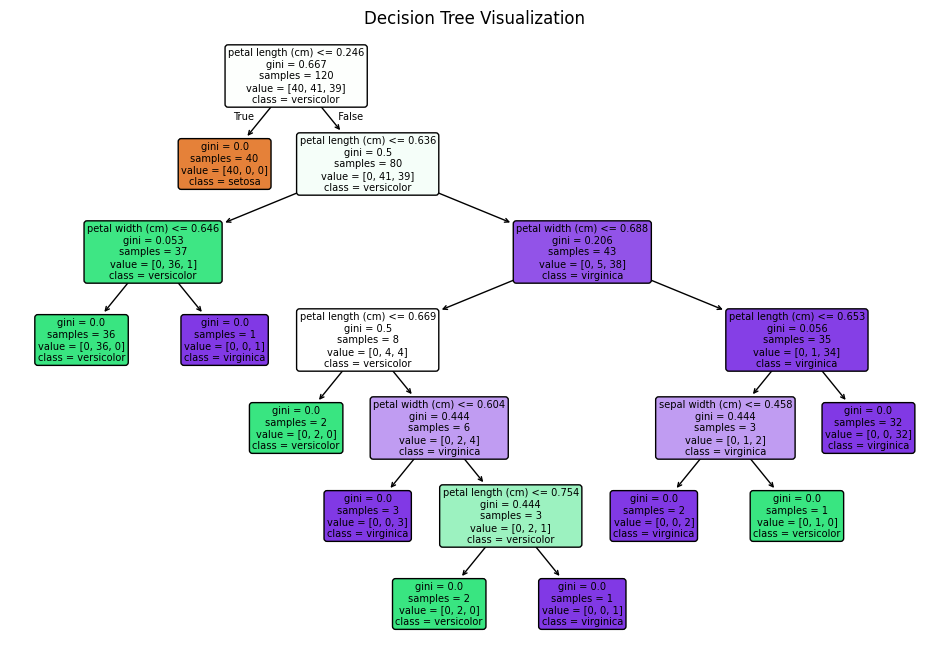

In [1]:
# ============================
# IMPORTS
# ============================
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# ============================
# LOAD & PREPROCESS (from Task 1)
# ============================
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[iris.feature_names])

# Target
y = df["species"]

# ============================
# TRAIN/TEST SPLIT FUNCTION
# ============================
def split_data(X, y, test_size=0.2):
    return train_test_split(X, y, test_size=test_size, random_state=42)

X_train, X_test, y_train, y_test = split_data(X_scaled, y)

# ============================
# 1. TRAIN DECISION TREE
# ============================
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# ============================
# 2. PREDICT & METRICS
# ============================
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Decision Tree Performance:")
print("------------------------------")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ============================
# 3. VISUALIZE DECISION TREE
# ============================
plt.figure(figsize=(12, 8))
plot_tree(dt,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        filled=True,
        rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -----------------------------
# Train KNN (k=5)
# -----------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
knn_pred = knn.predict(X_test)

# Metrics
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

print("KNN Performance (k=5):")
print("----------------------------")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)


KNN Performance (k=5):
----------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [1]:
#Part B
import random
import pandas as pd

# -----------------------------
# Generate Synthetic Data
# -----------------------------

items_pool = [
    'milk', 'bread', 'eggs', 'beer', 'diapers', 'cheese', 'butter', 'apples',
    'bananas', 'chicken', 'rice', 'pasta', 'cereal', 'coffee', 'tea', 'yogurt',
    'juice', 'chips', 'cookies', 'fish'
]

random.seed(42)

num_transactions = random.randint(20, 50)

transactions = []

for _ in range(num_transactions):
    basket_size = random.randint(3, 8)
    
    # introduce some realistic patterns
    basket = []
    
    # Common co-occurrences
    if random.random() < 0.4:
        basket += ['milk', 'bread']
    if random.random() < 0.3:
        basket += ['beer', 'diapers']
    if random.random() < 0.3:
        basket += ['chips', 'beer']
    
    # fill remaining items randomly
    remaining = basket_size - len(basket)
    if remaining > 0:
        basket += random.sample(items_pool, remaining)
    
    transactions.append(list(set(basket)))  # unique items per basket

# Display sample
for t in transactions[:5]:
    print(t)


['bread', 'milk', 'chips', 'beer', 'diapers']
['bread', 'coffee', 'milk', 'eggs', 'beer', 'cookies']
['chips', 'diapers', 'beer']
['bananas', 'rice', 'coffee', 'milk', 'cheese', 'eggs', 'beer', 'diapers']
['bread', 'pasta', 'bananas', 'milk']


In [2]:
from mlxtend.preprocessing import TransactionEncoder

# Convert to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()


,apples,bananas,beer,bread,butter,cereal,cheese,chicken,chips,coffee,cookies,diapers,eggs,fish,juice,milk,pasta,rice,tea,yogurt
0,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False
1,False,False,True,True,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,False
4,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False


In [3]:
from mlxtend.frequent_patterns import apriori, association_rules

# Frequent itemsets with support ≥ 0.2
freq_items = apriori(df, min_support=0.2, use_colnames=True)
freq_items


,support,itemsets
0,0.700,(beer)
1,0.425,(bread)
2,0.200,(butter)
3,0.450,(chips)
4,0.225,(cookies)
5,0.525,(diapers)
6,0.300,(eggs)
7,0.200,(juice)
8,0.475,(milk)
9,0.300,"(bread, beer)"


In [4]:

rules = association_rules(freq_items,
        metric="confidence",
        min_threshold=0.5)

# Sort by lift (descending)
rules_sorted = rules.sort_values(by="lift", ascending=False)

# Show top 5 rules
top5 = rules_sorted.head(5)
print(top5)


      antecedents    consequents  antecedent support  consequent support  \
17  (bread, beer)         (milk)               0.300               0.475   
20         (milk)  (bread, beer)               0.475               0.300   
19        (bread)   (beer, milk)               0.425               0.350   
18   (beer, milk)        (bread)               0.350               0.425   
9         (bread)         (milk)               0.425               0.475   

    support  confidence      lift  representativity  leverage  conviction  \
17    0.250    0.833333  1.754386               1.0  0.107500    3.150000   
20    0.250    0.526316  1.754386               1.0  0.107500    1.477778   
19    0.250    0.588235  1.680672               1.0  0.101250    1.578571   
18    0.250    0.714286  1.680672               1.0  0.101250    2.012500   
9     0.325    0.764706  1.609907               1.0  0.123125    2.231250   

    zhangs_metric   jaccard  certainty  kulczynski  
17       0.614286  0.476190